![Data-Preparation.jpg](https://images.xenonstack.com/blog/Data-Preparation.jpg " This is data prepration Step")

# Titanic Exploratory Data Analysis

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [DataSet Loading and Brif Description](#section2)<br>
    - 2.1 [Variable Notes](#section21)<br>
    - 2.2 [Data Import](#section22)<br>
3. [Examining Data Available From An Existing Information Source-Data profiling](#section3)<br>
    - 3.1 [Basic DataSet Understanding](#section31)<br>
    - 3.2 [Pre-Profile](#section32)<br>
    - 3.3 [Data Preprocessing](#section33)<br>
        - 3.3.1 [Null Value identify](#section331)<br>
        - 3.3.2 [Age NULL Value Replace with Median](#section332)<br>
        - 3.3.3 [Work on missing Embark Value](#section333)<br>
        - 3.3.4 [Work on Fare and replace NUll Value](#section334)<br>
        - 3.3.5 [Work on FamilySize](#section335)<br>
        - 3.3.6 [What is the name](#section336)<br>
        - 3.3.7 [Do you have longer names?](#section337)<br>
    - 3.4 [Post  Profiling](#section34)<br>
4. [Observation & Questions](#section4)<br>
    - 4.1 [How many People Survival](#section41)<br>
	- 4.2 [Pclass to Survival Rate](#section42)<br>
	- 4.3 [Sex to Survival Rate](#section43)<br>
        - 4.3.1 [Who is more likely to survive, Male or Female?](#section431)<br>
        - 4.3.2 [Males, females and child on the basis of Passenger Class?](#section432)<br>
	- 4.3 [Age to Survival Rate](#section43)<br>
    - 4.4 [Sex(GenderClass) to Embarked](#section44)<br>
        - 4.4.1 [Observation: Survival rate - Comparing Embarked and Sex](#section441)<br>
        - 4.4.2 [Observation: Survival rate - Comparing Embarked ,Sex and Pclass](#section442)<br>
	- 4.4 [SibSp to Survival Rate](#section44)<br>
	- 4.5 [Parch to Survival Rate](#section45)<br>
5. [Coorelation between all the features using heatmap.](#section5)<br>
6. [Hypothesis: Women and children are more likely to survive](#section6)<br> 

<a id = section1> </a>

# 1. Problem Statement


__What sorts of people were likely to survive.__

We will be doing and exploring with help of basic uses of __numpy__ and __pandas__ and will cover basic syntex/command of __Exploratory Data Analysis(EDA)__  which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

- Defining the problem statement (Intrduction)
- Collecting the data (Source)
- Preprocessing the data (Data wrangling)
- Exploratory data analysis (EDA)<br>
    Understand the data by EDA and EDA is a critical and first step in analyzing the data.
    - Finding patterns in Data ( Classification, Clustering, Correlation, Regression .. )
    - Checking of assumptions
    - Determining relationships in Data
    - Preliminary selection of appropriate technology  ( use of techniques of system analysis/operations research in the selection of the optimal - or most appropriate)
    - Detection of mistakes


<a id = section2> </a>

# 2. DataSet Loading and Brif Description

| Column Name   | Description                                               |
| ------------- |-------------                                              | 
| PassengerId   | Passenger Identity                                        | 
| Cabin         | Cabin number                                              |
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| Pclass        | Class of ticket  (1 = first; 2 = second; 3 = third)       | 
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Embarked      | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|
| Survived      | Whether passenger survived or not Survival (0 = no; 1 = yes)| 

<a id=section21></a>

## 2.1 Variable Notes
__pclass:__<br> A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

__age:__ <br> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp:__ The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

__parch:__ The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

<a id=section22></a>

# 2.2 Data Import

In [2]:
# Importing packges

import numpy as np              # milti-dimensional array and matrices
import pandas as pd             # manipulation and analysis
import pandas_profiling 
import matplotlib.pyplot as plt # umerical mathematics extension NumPy ( Ploting libarary)
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics


'''
%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of 
plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that
produced it.
'''

%matplotlib inline

In [4]:
# we can see the value of multiple statements at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing data Set Desktop/TanujGit/ExploratoryDataAnalysis-EDA/DataSet

TitanicData = pd.read_csv("C://Users//t.shah//Desktop//TanujGit//ExploratoryDataAnalysis-EDA//DataSet/Titanic_DataSet.csv")
TitanicData.head()
TitanicData.tail()

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived
886,887,NaN,"Montvila, Rev. Juozas",male,27.0,2,0,0,211536,13.00,S,0
887,888,B42,"Graham, Miss. Margaret Edith",female,19.0,1,0,0,112053,30.00,S,1
888,889,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,1,2,W./C. 6607,23.45,S,0
889,890,C148,"Behr, Mr. Karl Howell",male,26.0,1,0,0,111369,30.00,C,1
890,891,NaN,"Dooley, Mr. Patrick",male,32.0,3,0,0,370376,7.75,Q,0


<a id = section3> </a>

# 3.Examining Data Available From An Existing Information Source-Data profiling

<a id=section31> </a>

## 3.1 Basic DataSet Understanding

In [3]:
TitanicData.shape

(891, 12)

In [4]:
TitanicData.columns

Index(['PassengerId', 'Cabin', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [5]:
TitanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Cabin          204 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Observation:


- Total row __891__ and columns are __12__
- PassengerId, Name, Sex, Pclass, sibsp, Parch, Ticket, Fare and Survived, which has all 891 has __NOT Null__ values.
- Cabin  __78%__ Null values
- Age __20% Null__ Values
- Embarked   __~0.03%__ Null Values ( only 2 records has null values)


In [211]:
TitanicData.select_dtypes(include=['object']).head()

,Cabin,Name,Sex,Ticket,Embarked
0,NaN,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,NaN,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,NaN,"Allen, Mr. William Henry",male,373450,S


In [214]:
total = TitanicData.isnull().sum().sort_values(ascending=False)
percent_1 = TitanicData.isnull().sum()/TitanicData.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Fare,0,0.0


In [6]:
#lets see if there are any more columns with missing values 
null_columns=TitanicData.columns[TitanicData.isnull().any()]
TitanicData.isnull().sum()

PassengerId      0
Cabin          687
Name             0
Sex              0
Age            177
Pclass           0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [8]:
null_columns # Age, Fare and cabin has missing values. we will see how to fill missing values next.

Index(['Cabin', 'Age', 'Embarked'], dtype='object')

In [7]:
TitanicData.describe()
# include='all' gives the summary statistics of all the columns.

,PassengerId,Age,Pclass,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,2.308642,0.523008,0.381594,32.204208,0.383838
std,257.353842,14.526497,0.836071,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,28.000000,3.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,38.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,80.000000,3.000000,8.000000,6.000000,512.329200,1.000000


### Observation :
- The mean, min and max are self-explanatory.
- std is the standard deviation, which shows how data is dispersed.
- The larger Variance /Standard Deviation in Dataset more dispersed in dataset. You can see STD value is 49.693429 for FARE. And min is zero and max value 512.32920.
- Function gives the __mean, std and IQR(Interquartile range)__ values. It excludes character column and calculate summary statistics only for numeric columns
- Min “__Fare__“ is zero. There might be politics, coupon , staff, pilot seat. There could be any reason whose fare is ZERO.
- For __Pclass__, mean (2.308642) is lower than the median (3.0000)(50%). This shows that the classes of the passenger was skewed more towards 3rd class, as most people were on the 3rd class.
- For Fare, mean (32.204208) is higher than the median (14.454200). This shows that the fares were skewed more towards lower fares, as most people were on the 3rd class
- For __SibSp__, the mean is (0.523008) is higher than the median(0.0000). The skew is to the left as many passengers were travelling without a spouse or sibling.
- For __Survived__, mean (0.383838) is higher than the median (0.0000). This is because many passengers died, thus skew was to the left.


<a id = section32> </a>

## 3.2 Pre-Profile

In [5]:
profile = pandas_profiling.ProfileReport(TitanicData)
profile.to_file(outputfile="titanic_before_preprocessing.html")

<a id = section33> </a>

## 3.3 Data Preprocesing
- Very very basic Dealing with missing values
        -We can replace missing values of Age with median values.
        -Replacing 0 values of fare with median values.
        -Cabin Has too many values , we can drop column.

<a id= section331></a>

### 3.3.1 Null Value identify

In [15]:
Median_Age = TitanicData.Age.median()
TitanicData.Age.fillna(Median_Age, inplace = True)

<a id = section332></a>

### 3.3.2 Age NULL Value Replace with Median

In [6]:
#lets see if there are any more columns with missing values 
null_columns=TitanicData.columns[TitanicData.isnull().any()]
TitanicData.isnull().sum()

PassengerId      0
Cabin          687
Name             0
Sex              0
Age            177
Pclass           0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

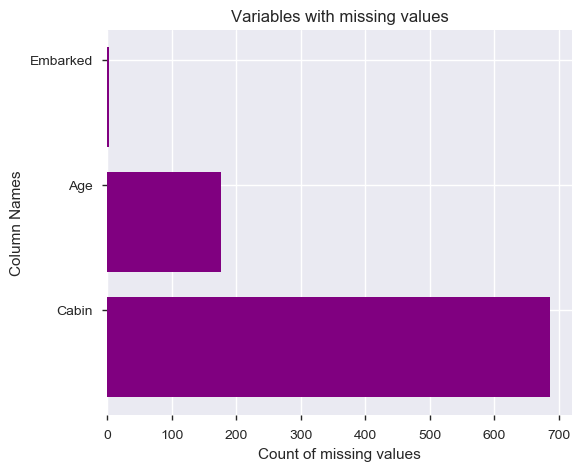

In [7]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(TitanicData[col].isnull().sum())
ind = np.arange(len(labels))
ind
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [125]:
TitanicData.columns.values

array(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'], dtype=object)

<a id = section333></id>

### 3.3.3 Work on missing Embark Value

In [123]:
#Lets check which rows have null Embarked column
TitanicData[TitanicData['Embarked'].isnull()]

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived
61,62,B28,"Icard, Miss. Amelie",female,38.0,1,0,0,113572,80.0,NaN,1
829,830,B28,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,1,0,0,113572,80.0,NaN,1


### __Observation__:
    
    PassengerId 62 and 830 have missing embarked values
    Both have Passenger class 1 and fare $80.

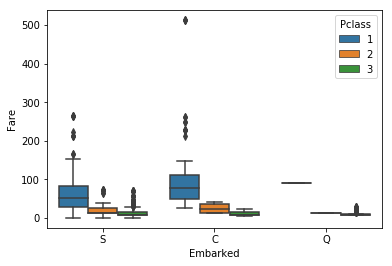

In [125]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=TitanicData);

__We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'__

In [126]:
TitanicData["Embarked"] = TitanicData["Embarked"].fillna('C')

In [133]:
# Fare Column 
TitanicData[TitanicData['Fare'].isnull()]


#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(TitanicData):
    median_fare=TitanicData[(TitanicData['Pclass'] == 3) & (TitanicData['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    TitanicData["Fare"] = TitanicData["Fare"].fillna(median_fare)
    return TitanicData


fill_missing_fare(TitanicData)

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived


In [ ]:
<a id = section334></a>

### 3.3.4 Work on Fare and replace NUll Value

In [14]:
TitanicData['Fare']=TitanicData['Fare'].replace(0,TitanicData['Fare'].median())

<a id = section335></a>

### 3.3.5 Work on FamilySize

In [146]:
TitanicData['FamilySize'] = TitanicData['SibSp'] + TitanicData['Parch']+1

In [147]:
TitanicData["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [150]:
# Discretize family size
TitanicData.loc[TitanicData["FamilySize"] == 1, "FsizeD"] = 'singleton'
TitanicData.loc[(TitanicData["FamilySize"] > 1)  &  (TitanicData["FamilySize"] < 5) , "FsizeD"] = 'small'
TitanicData.loc[TitanicData["FamilySize"] >4, "FsizeD"] = 'large'
TitanicData["FsizeD"].unique()
TitanicData["FsizeD"].value_counts()

array(['small', 'singleton', 'large'], dtype=object)

singleton    537
small        292
large         62
Name: FsizeD, dtype: int64

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


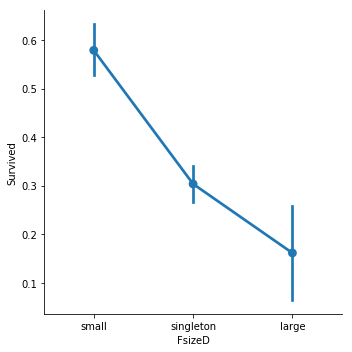

In [151]:
sns.factorplot(x="FsizeD", y="Survived", data=TitanicData);

In [7]:
TitanicData['GenderClass'] = TitanicData.apply(lambda x: 'Child' if x['Age'] < 15 else x['Sex'],axis=1)

In [128]:
TitanicData.columns.values

array(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'FamilySize'],
      dtype=object)

<a id = section302> </a>

In [134]:
TitanicData[TitanicData.Age<15].head(2)

,PassengerId,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived,FamilySize,GenderClass
7,8,"Palsson, Master. Gosta Leonard",male,2.0,3,3,1,349909,21.0750,S,0,5,Child
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,2,1,0,237736,30.0708,C,1,2,Child


<a id = section336></a>

### 3.3.6 What is the name

In [163]:
import re
#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    TitanicData_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if TitanicData_search:
        return TitanicData_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = TitanicData["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Countess      1
Capt          1
Don           1
Sir           1
Jonkheer      1
Mme           1
Lady          1
Name: Name, dtype: int64


In [174]:
TitanicData["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

TitanicData.loc[TitanicData["Title"].isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
        'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle', 'Ms', 'Mme']), "Title"] = 'Rare Title'


# Testing 
# TitanicData[TitanicData['Title'].isin(['Dona', 'Lady', 'Countess'])]
# TitanicData.query("Title in ('Dona', 'Lady', 'Countess')")

TitanicData["Title"].value_counts()

Mr            517
Miss          182
Mrs           125
Master         40
Rare Title     27
Name: Title, dtype: int64

<a id = section337></a>

### 3.3.7 Do you have longer names?

In [196]:
#Create feture for length of name 
# The .apply method generates a new series
TitanicData["NameLength"] = TitanicData["Name"].apply(lambda x: len(x))
TitanicData["NameLength"].min() # 12
TitanicData["NameLength"].max() # 82

12

82

In [197]:
for i in range(85,4,-20):
    TitanicData.loc[ TitanicData['NameLength'] <= i*10/10, 'Buckets_NameLength'] = i
TitanicData["Buckets_NameLength"].value_counts()

25.0    458
45.0    378
65.0     53
85.0      2
Name: Buckets_NameLength, dtype: int64

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


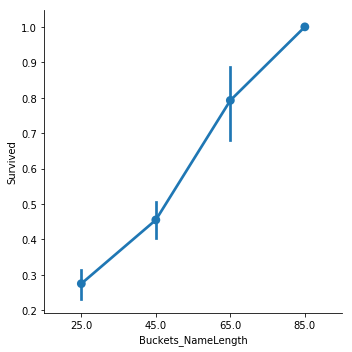

In [192]:
sns.factorplot(x="Buckets_NameLength", y="Survived", data=TitanicData)

<a id = section338></id>

### 3.3.8 Ticket column

In [199]:
TitanicData["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [201]:
TitanicData["Ticket"].str.extract('(\d{2,})', expand=True).head()

,0
0,21171
1,17599
2,3101282
3,113803
4,373450


In [203]:
TitanicData["TicketNumber"] = TitanicData["Ticket"].str.extract('(\d{2,})', expand=True)
TitanicData["TicketNumber"] = TitanicData["TicketNumber"].apply(pd.to_numeric)

In [204]:
TitanicData["TicketNumber"].head()

0      21171.0
1      17599.0
2    3101282.0
3     113803.0
4     373450.0
Name: TicketNumber, dtype: float64

In [206]:
#some rows in ticket column dont have numeric value so we got NaN there
TitanicData[TitanicData["TicketNumber"].isnull()]


,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived,Deck,FamilySize,FsizeD,Title,NameLength,Buckets_NameLength,NlengthD,TicketNumber
179,180,NaN,"Leonard, Mr. Lionel",male,36.0,3,0,0,LINE,0.0,S,0,Z,1,singleton,Mr,19,25.0,short,NaN
271,272,NaN,"Tornquist, Mr. William Henry",male,25.0,3,0,0,LINE,0.0,S,1,Z,1,singleton,Mr,28,45.0,okay,NaN
302,303,NaN,"Johnson, Mr. William Cahoone Jr",male,19.0,3,0,0,LINE,0.0,S,0,Z,1,singleton,Mr,31,45.0,okay,NaN
597,598,NaN,"Johnson, Mr. Alfred",male,49.0,3,0,0,LINE,0.0,S,0,Z,1,singleton,Mr,19,25.0,short,NaN
772,773,E77,"Mack, Mrs. (Mary)",female,57.0,2,0,0,S.O./P.P. 3,10.5,S,0,E,1,singleton,Mrs,17,25.0,short,NaN
841,842,NaN,"Mudd, Mr. Thomas Charles",male,16.0,2,0,0,S.O./P.P. 3,10.5,S,0,Z,1,singleton,Mr,24,25.0,okay,NaN


In [207]:
TitanicData.TicketNumber.fillna(TitanicData["TicketNumber"].median(), inplace=True)

In [208]:
TitanicData[TitanicData["TicketNumber"].isnull()]

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived,Deck,FamilySize,FsizeD,Title,NameLength,Buckets_NameLength,NlengthD,TicketNumber


<a id = section34></a>

## 3.4 Post  Profiling


In [166]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(TitanicData)
profile.to_file(outputfile="titanic_after_postprocessing.html")

<a id = section4></a>

## 4. Observation & Questionse


<a id = section41></a>

### 4.1 How many People Survival

Text(0.5,1,'Plot for survived Count.')

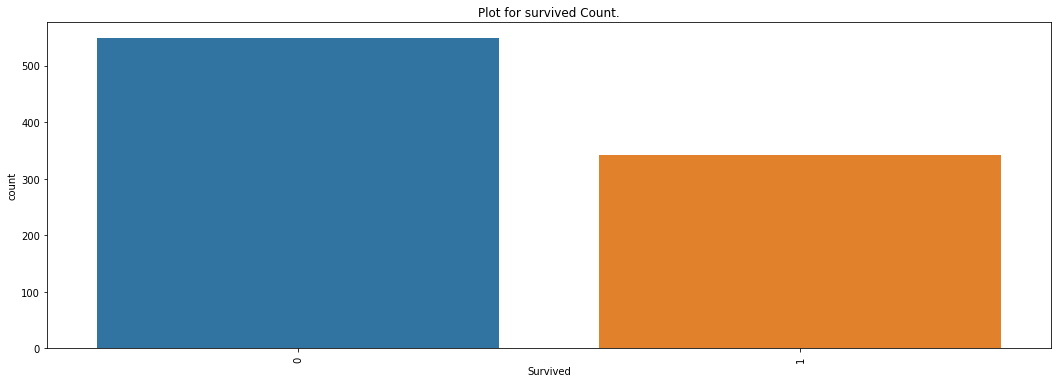

In [10]:
# TitanicData.groupby(['Survived']).count()['PassengerId'].plot.bar()
fig = plt.figure(figsize=(18,6))      ## To get a figure with proper structure
TitanicData.Survived.value_counts().plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency
sns.countplot(x='Survived', data=TitanicData).set_title('Plot for survived Count.')

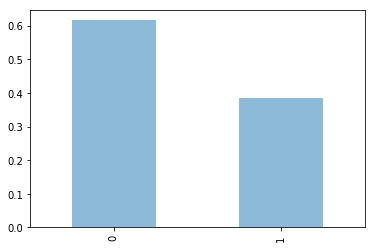

In [11]:
TitanicData.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)  ## Setting alpha as per transparency

__Observastion :__ More people died than survived

    We can obviously see that approximate of 350 people survived and 550 people died, we can use normalization technique inorder to view concreate percentages.
    From here we can see 40% people survived and 60% of people died.

Since we have all age of the passengers, we can see the relationship between age and survival rate. Here as we gonna plot two different attributes scatter plot will do

<a id = section42></a>

### 4.2 Pclass to Survival Rate

Text(0.5,1,'Plot for Class Count.')

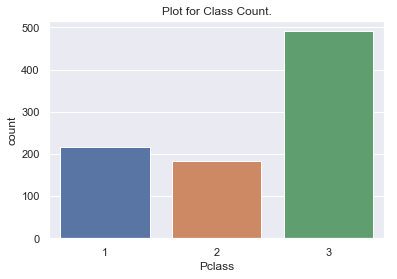

In [13]:
# counts for a single categorical variable
sns.set(style="darkgrid")
sns.countplot(x='Pclass', data=TitanicData).set_title('Plot for Class Count.')
# TitanicData.Pclass.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

__Observation :__ 55% of people are from 3rd class and 25% and 20% from the rest.

There are actually 2 plots that are pretty cool to use if we wanna find correlation between two different features. one is scatter plot which we seen above and another one is KDE (Kernal Desnsity estimation). Let's correlate passenger class with passengers age.

Text(0.5,1,'Age wrt Pclass')

'From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious. '

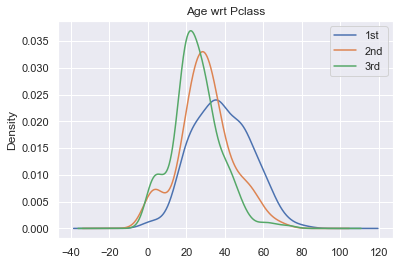

In [17]:
for x in [1,2,3]:    ## for 3 classes
    TitanicData.Age[TitanicData.Pclass == x].plot(kind="kde")
plt.title("Age wrt Pclass")
plt.legend(("1st","2nd","3rd"))

From the above we can conclude that more older people are from 1st class than that of 2nd and 3rd which is obvious.

<a id = section43></a>

### 4.3 Sex to Survival Rate

Let's try to understand how Age  is Varying in therm of gender

Text(0.5,1,'Age distribution \nusing FacetGrid')

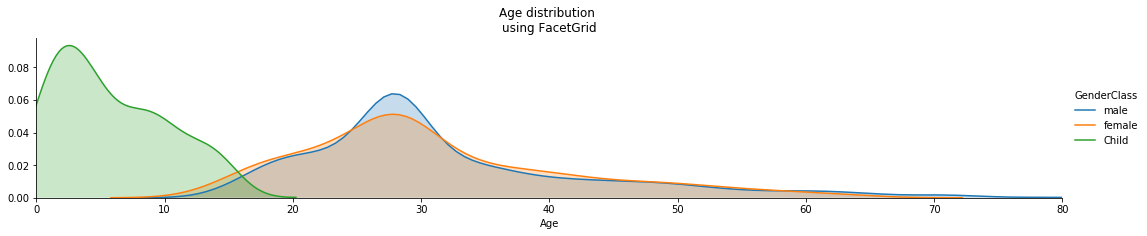

In [16]:
oldest = TitanicData['Age'].max()
Graph = sns.FacetGrid(TitanicData,hue='GenderClass',aspect=5)
Graph.map(sns.kdeplot,'Age',shade=True)
Graph.set(xlim=(0,oldest))
Graph.add_legend()
plt.title('Age distribution \nusing FacetGrid')

__Observation :__
    
    👎 Most of people are belong to 25- 35 
    👎 child of Age 3-8 yrs are in majority.

__Note:__
    
    Using groupby, it's very diffcult to observe quickly by looking Numbers.

In [17]:
TitanicData.groupby(['GenderClass','Survived'])['Survived'].count()

GenderClass  Survived
Child        0            33
             1            45
female       0            66
             1           209
male         0           450
             1            88
Name: Survived, dtype: int64

Text(0.5,1,'Factor plot for male female and child')

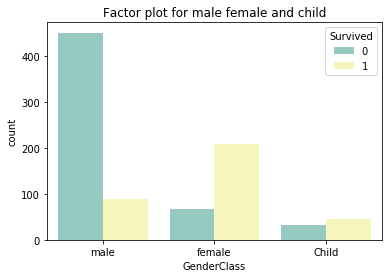

In [36]:
# TitanicData.groupby(['GenderClass','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
# sns.factorplot('GenderClass', hue='Survived', kind='count', data=titanic_data);

sns.countplot(x="GenderClass", hue='Survived', data=TitanicData, palette="Set3")

plt.title('Factor plot for male female and child')

__Observastion:__
    
    👌 The highest probability to survive are Female
    👎 Majority of males died.

In [39]:
print(TitanicData[TitanicData.GenderClass == 'female']['Survived'].sum()/TitanicData[TitanicData.GenderClass == 'female']['Survived'].count(), " % of women survived: ")
print(TitanicData[TitanicData.GenderClass == 'male']['Survived'].sum()/TitanicData[TitanicData.GenderClass == 'male']['Survived'].count(), "% of men survived:   " )
print(TitanicData[TitanicData.GenderClass == 'Child']['Survived'].sum()/TitanicData[TitanicData.GenderClass == 'Child']['Survived'].count(), "% of child survived:   "  )

0.76  % of women survived: 
0.16356877323420074 % of men survived:   
0.5769230769230769 % of child survived:   


Text(0.5,1,'Survived (male)')

Text(0.5,1,'Survived (female)')

Text(0.5,1,'Survived (Child)')

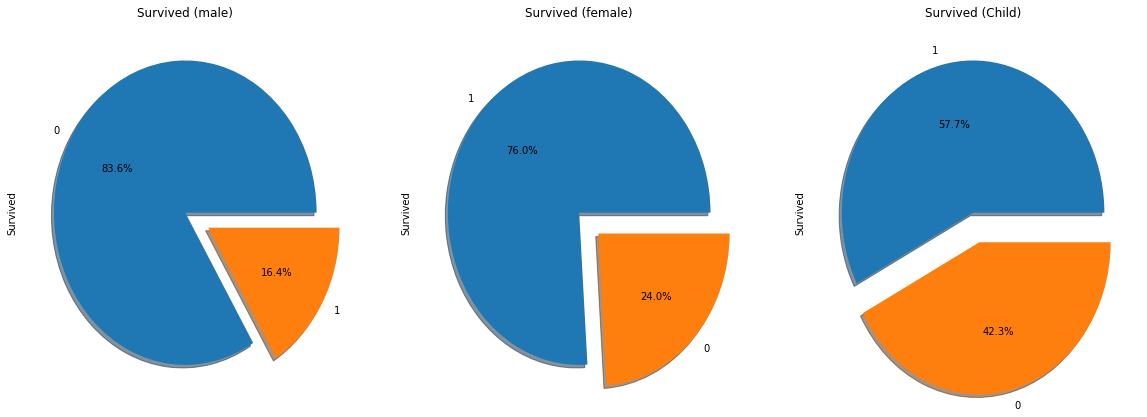

In [41]:
# titanic_data['Survived'][titanic_data['GenderClass'] == 'male'].value_counts()
# titanic_data['Survived'][titanic_data['GenderClass'] == 'female'].value_counts()
# (titanic_data.Survived==0).sum()
f,ax = plt.subplots(1,3,figsize=(20,7))
TitanicData['Survived'][TitanicData['GenderClass'] == 'male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
TitanicData['Survived'][TitanicData['GenderClass'] == 'female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
TitanicData['Survived'][TitanicData['GenderClass'] == 'Child'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (Child)')

__Observation__:
    
    👎  Only 16% of males survived.
    👌   57% of children also survived.
    👍  76% of females survived.
    


In [46]:
print("Percentage of survivals in") 
print("Pclass=1 : ", TitanicData.Survived[TitanicData.Pclass == 1].sum()/TitanicData[TitanicData.Pclass == 1].Survived.count())
print("Pclass=2 : ", TitanicData.Survived[TitanicData.Pclass == 2].sum()/TitanicData[TitanicData.Pclass == 2].Survived.count())
print("Pclass=3 : ", TitanicData.Survived[TitanicData.Pclass == 3].sum()/TitanicData[TitanicData.Pclass == 3].Survived.count())

Percentage of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


In [51]:
pd.crosstab([TitanicData.GenderClass, TitanicData.Survived], TitanicData.Pclass, margins=True).apply(lambda r: 100*r/len(TitanicData), axis=1)

Pclass                        1          2          3         All
GenderClass Survived                                             
Child       0          0.112233   0.000000   3.591470    3.703704
            1          0.448934   2.132435   2.469136    5.050505
female      0          0.224467   0.673401   6.509540    7.407407
            1         10.101010   6.734007   6.621773   23.456790
male        0          8.641975  10.213244  31.649832   50.505051
            1          4.713805   0.897868   4.264871    9.876543
All                   24.242424  20.650954  55.106622  100.000000

Please notice, it's' showing percentage of males, females and children survived are varying depending on the passenger class, but its very diffcult by looking insights of data. So we will see by different graph

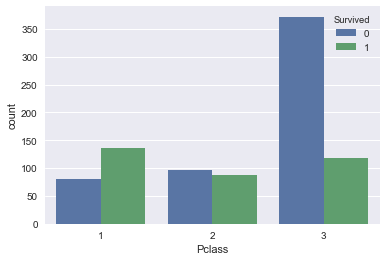

In [145]:
## TitanicData.groupby(['Pclass','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
sns.countplot(x="Pclass", hue="Survived", data=TitanicData)

__Observation:__
- __More__ people who __died__ from __Pclass3__
- for __Pclass 1 survival rate is more.__

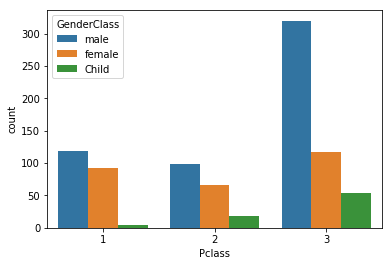

In [52]:
# Count of  two categorical variables
# TitanicData.groupby(['Pclass','GenderClass'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)

# Drawing factorplot to look at the distribution of popluation with Pclass and GenderClass.
# sns.factorplot('Pclass', data=titanic_data, hue='GenderClass', kind='count')
# plt.title('Factorplot with kind = "count" for Pclass and GenderClass')


sns.countplot(x="Pclass", hue="GenderClass", data=TitanicData)

__Observation__   
    1) Pclass 3 have maximum number of males<br>
    2) Pclass 1 have minimum number of children.

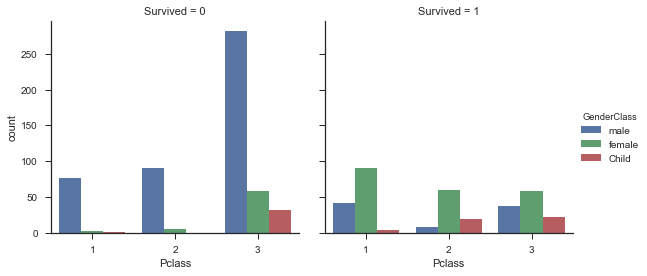

In [165]:
# USING catplot() to combine a countplot() and a FacetGrid
# factorplot has been changed in new version to catplot().
sns.factorplot(x="Pclass", hue="GenderClass", col="Survived", data=TitanicData, kind="count")

- Surviavl rate with Pclass and GenderClass with help of factorplot 

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Factorplot for Survivale rate variation with Pclass and GenderClass')

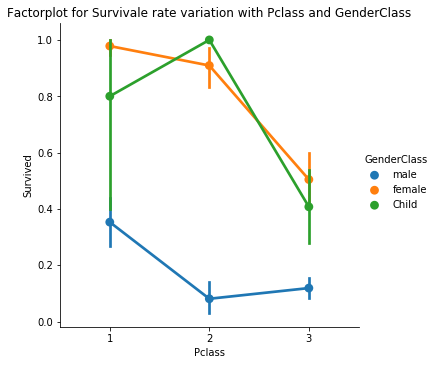

In [53]:
sns.factorplot('Pclass','Survived', hue='GenderClass', data=TitanicData)
plt.title('Survivale rate variation with Pclass and GenderClass')

__Observation:__
    
👌 __Almost all women__ in Pclass __1 and 2 survived__ and 👎 __nearly all men__ in Pclass __2 and 3 died.__<br>
👎 The survival rate is _less_ for all the _3rd class passengers._ <br>
👎 The survival rate for male is very __low__ _irrespective of the class_ he belongs to. 

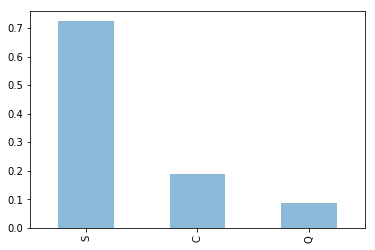

In [115]:
TitanicData.Embarked.value_counts(normalize=True).plot(kind="bar", alpha = 0.5)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


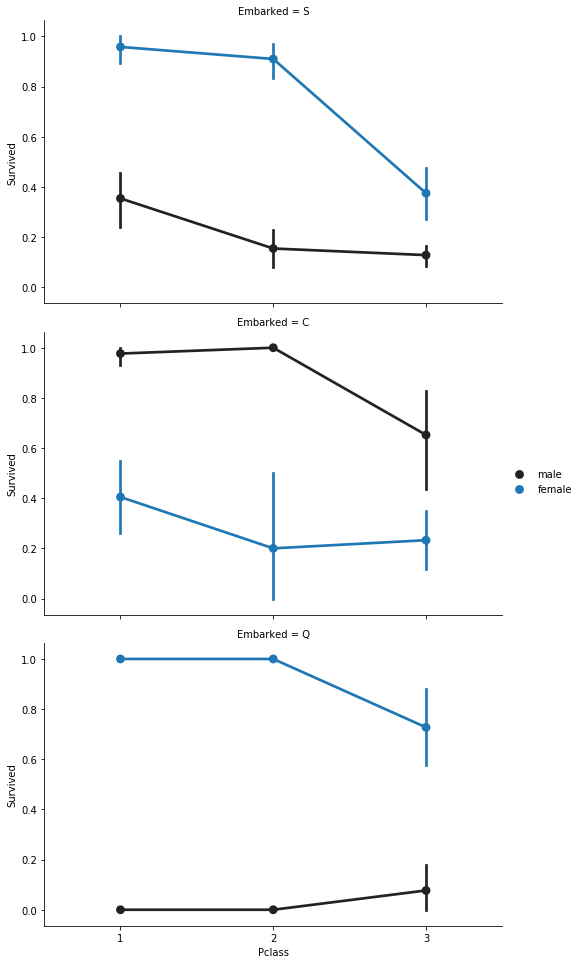

In [215]:
FacetGrid = sns.FacetGrid(TitanicData, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

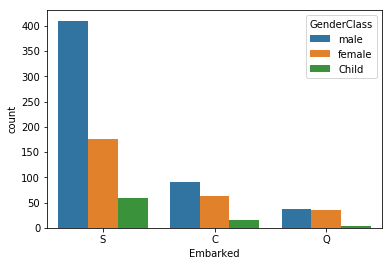

In [57]:
sns.countplot('Embarked',data=TitanicData, hue='GenderClass')

#### How Distribut data of GenderClass with respect to Embarked
__Observation:__
- Magarity people  are belong to __S__ and belong to Male

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Survival rate variation with Embarked and GenderClass ')

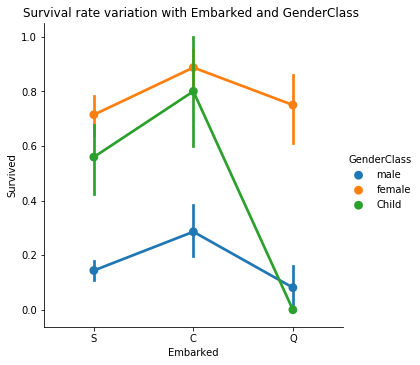

In [60]:
sns.factorplot('Embarked','Survived', hue= 'GenderClass', kind='point', data= TitanicData)
plt.title('Survival rate variation with Embarked and GenderClass ')
plt.show()

- Chances of survival of __males__ boarding from __Q__ is _lowest_
- Chances of survival of __females__ who boarded from __C__ is _highest_.


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text yticklabel objects>)

Text(0.5,1,'Relation Between Pclass and Embarked')

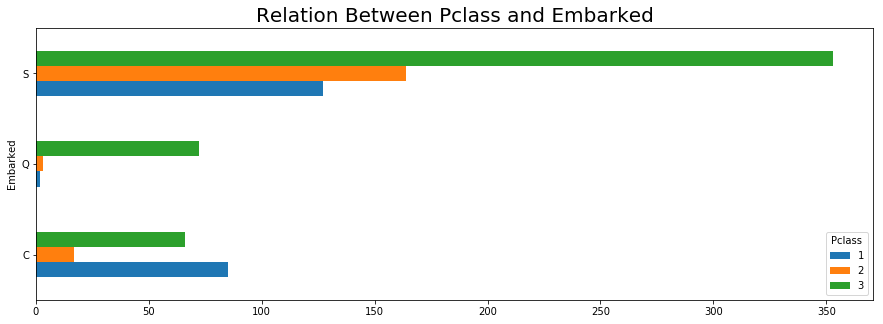

In [63]:
relation = pd.crosstab( TitanicData.Embarked, TitanicData.Pclass )
relation.plot.barh(figsize=(15,5))
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Relation Between Pclass and Embarked',size=20)

- Maximum people who boarded from S belongs to Pclass 3.
- Most of the passengers belonging to Pclass 1 boarded from C and S

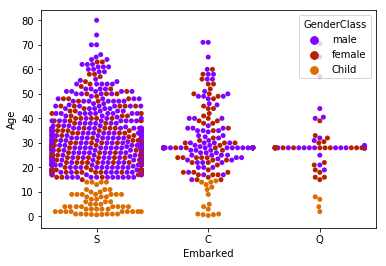

In [65]:
sns.swarmplot(x="Embarked", y="Age", hue="GenderClass", palette="gnuplot", data=TitanicData)

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


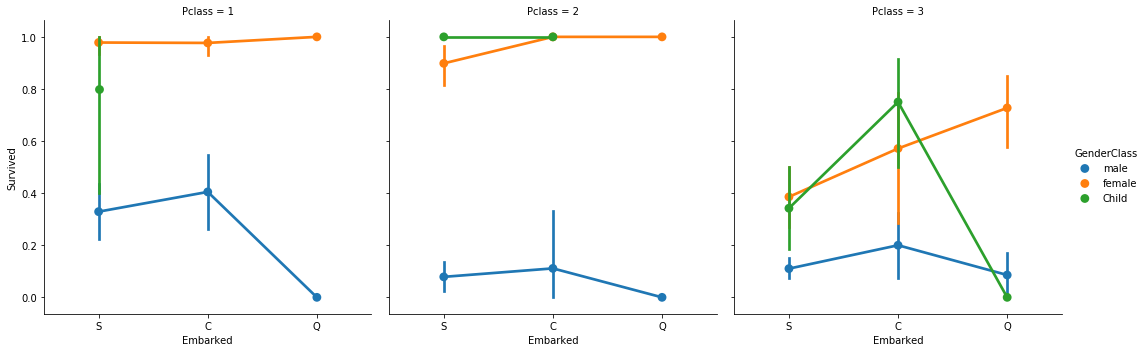

In [67]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'GenderClass', kind='point', data = TitanicData)
plt.show()

__Observation:__
- Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived_.
- All men of Pclass 1 and 2 embarked in Q died, survival rate for men in Pclass 2 and 3 is always below 0.2.
- For the remaining men in Pclass 1 that embarked in S and C, survival rate is approx. 0.4

In [ ]:
### Comparing count of those who survived and died with respect to the Buckets_Age they are in.

In [86]:
for i in range(8,0,-1):
        TitanicData.loc[ TitanicData['Age'] <= i*10, 'Buckets_Age'] = i

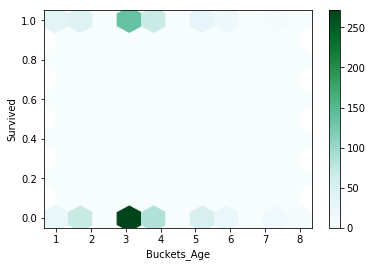

In [93]:
TitanicData.plot.hexbin(x='Buckets_Age', y='Survived',  gridsize=10)

__Observation:__
    
Comparing count of those who survived and died with respect to the Age_bin they are in.

    1) Age_bin 1: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means more children survived than died.
    2) Age_bin 3: More died than survived, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group.
    3) Age_bin >4: More people died than survived.

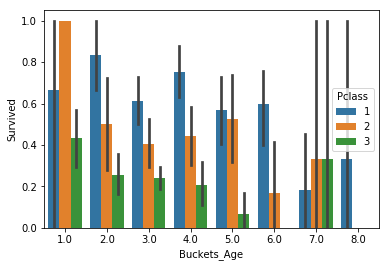

In [96]:
sns.barplot(x = "Buckets_Age", y = "Survived", hue = "Pclass", data = TitanicData)
plt.show()

In [101]:
TitanicData[(TitanicData.Buckets_Age == 1)]['Pclass'].value_counts()
TitanicData[(TitanicData.Buckets_Age == 1)&(TitanicData.Pclass == 1)]['Survived']
TitanicData[(TitanicData.Buckets_Age == 8)]['Pclass'].value_counts()

3    44
2    17
1     3
Name: Pclass, dtype: int64

297    0
305    1
445    1
Name: Survived, dtype: int64

1    3
3    2
Name: Pclass, dtype: int64

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


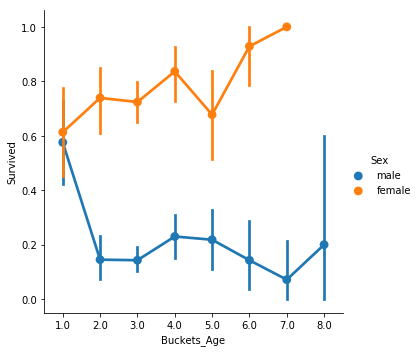

In [99]:
sns.factorplot('Buckets_Age','Survived',hue='Sex',kind='point',data=TitanicData)


__Observation__:
    Its clear from the above graph that among people of all the ages, females in general have higher probability of survival than males.

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


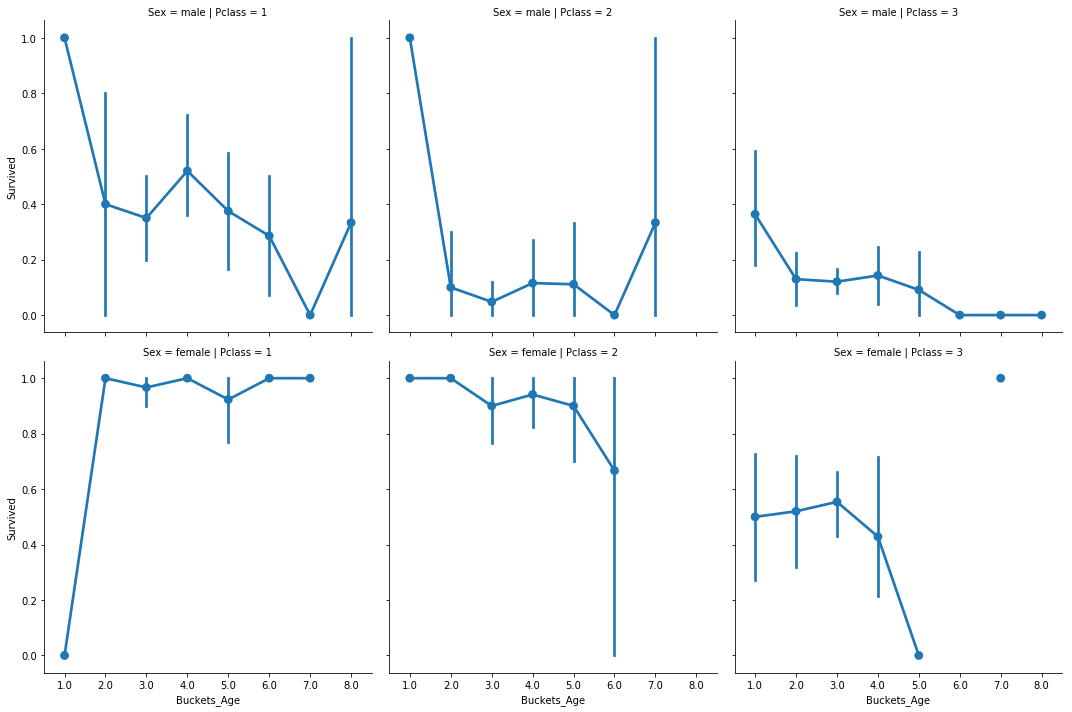

In [100]:
sns.factorplot('Buckets_Age','Survived', col='Pclass' , row = 'Sex', kind='point', data=TitanicData)
plt.show()

Calculating number of females from each Pclass in age group 1.

In [104]:
TitanicData[(TitanicData.Buckets_Age == 1) & (TitanicData.Sex =='female')]['Pclass'].value_counts()

3    22
2     8
1     1
Name: Pclass, dtype: int64

__Observation:__
- Among __males__, probability of survival of __children__ is _higher_ than rest age groups.<br/>
- In general for males, as __Pclass increases, survival probability decreases.__
- Among female children (Age_bin == 1), there is only 1 girl, therfore _discarding_ this.<br/>
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

### Analysing survival rate with FamilySize

C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'Survival by Total Family Size')

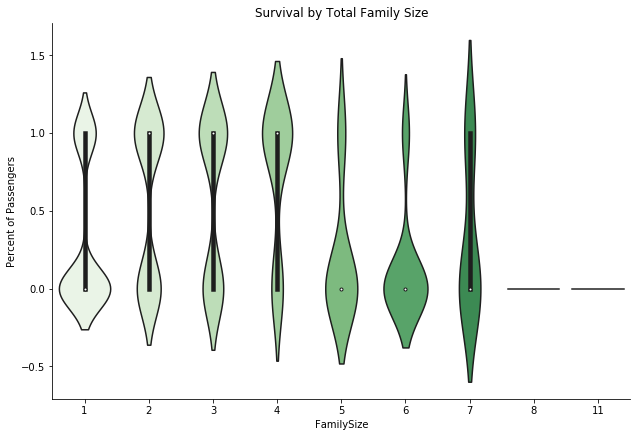

In [105]:
ax = sns.factorplot(x='FamilySize', y='Survived', data=TitanicData, kind='violin', aspect=1.5, size=6, palette="Greens")
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Total Family Size')

__Observation__:

As __size of family increases__ its chances of survival also __increases__.
    

### 4.9 Segment fare in bins of size 12

Text(0.5,1,'Distribution of Fare')

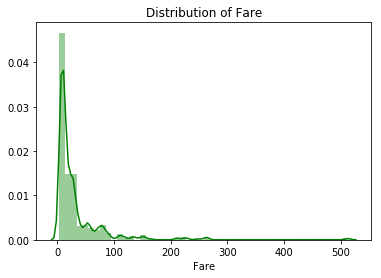

In [107]:
sns.distplot(TitanicData['Fare'],color ='g')
plt.title('Distribution of Fare')
plt.show()

__Observation:__
    
We have seen that 'Fare' mostly varies between 10 and 90. We will use this information to create bins.

- Creating a new column named __'Bucket_Fare'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [110]:
for i in range(12,0,-1):
    TitanicData.loc[TitanicData['Fare'] <= i*10, 'Bucket_Fare'] = i
TitanicData.loc[TitanicData['Fare'] >110, 'Bucket_Fare']= 12

In [111]:
print(TitanicData[['Fare' , 'Bucket_Fare']].groupby('Bucket_Fare')['Fare'].count())

Bucket_Fare
1.0     321
2.0     194
3.0     142
4.0      58
5.0      16
6.0      38
7.0      17
8.0      31
9.0      17
10.0      4
11.0      4
12.0     49
Name: Fare, dtype: int64


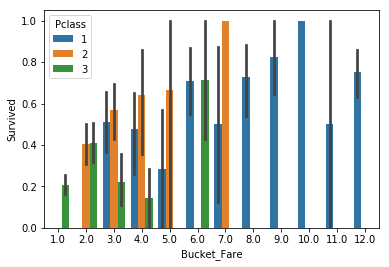

In [112]:
sns.barplot(x = "Bucket_Fare", y = "Survived", hue = "Pclass", data = TitanicData)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

### Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

Text(0.5,1,'Pair Plot')

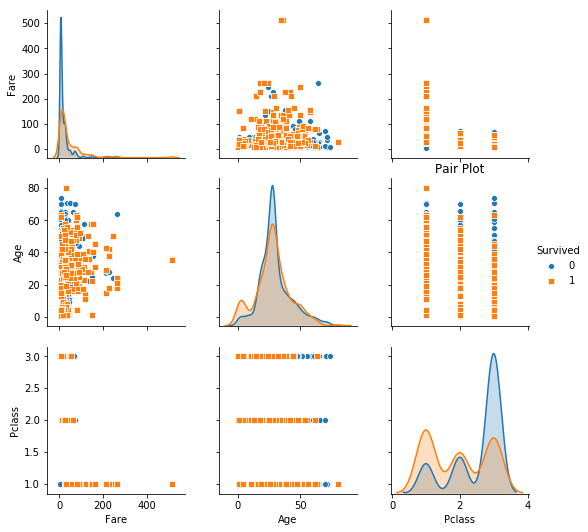

In [114]:
sns.pairplot(TitanicData[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

## Deck- Where exactly were passenger on the ship?

In [8]:
## If no need to do analysis, We can drop 
## TitanicData.drop('Cabin', axis = 1,inplace = True)

In [135]:
TitanicData['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [139]:
TitanicData["Deck"]=TitanicData.Cabin.str[0] 
TitanicData["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [141]:
TitanicData.head()

,PassengerId,Cabin,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived,Deck
0,1,NaN,"Braund, Mr. Owen Harris",male,22.0,3,1,0,A/5 21171,7.2500,S,0,NaN
1,2,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,0,PC 17599,71.2833,C,1,C
2,3,NaN,"Heikkinen, Miss. Laina",female,26.0,3,0,0,STON/O2. 3101282,7.9250,S,1,NaN
3,4,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,0,113803,53.1000,S,1,C
4,5,NaN,"Allen, Mr. William Henry",male,35.0,3,0,0,373450,8.0500,S,0,NaN


C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\t.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


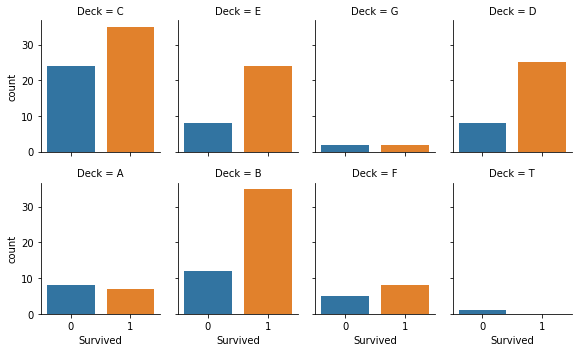

In [140]:
sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=TitanicData,
                    kind="count", size=2.5, aspect=.8);

In [142]:
TitanicData.Deck.fillna('Z', inplace=True)
TitanicData["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

### 5.Coorelation between all the features using heatmap.

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Correlation between features')

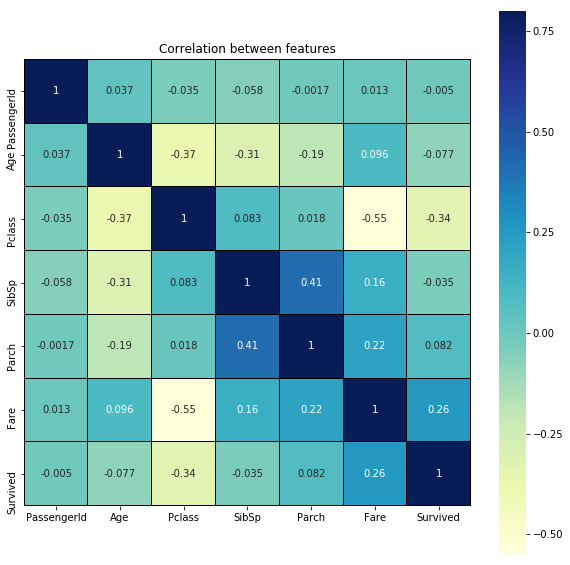

In [212]:
corr = TitanicData.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

### 6.Hypothesis: Women and children are more likely to survive

We observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.